In [9]:
# write code that takes L A and B images as input and displays the image using matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os


def display_image(L, A, B):
    # Convert L, A, B to a single image
    lab_image = np.zeros((L.shape[0], L.shape[1], 3), dtype=np.uint8)
    lab_image[:, :, 0] = L
    lab_image[:, :, 1] = A
    lab_image[:, :, 2] = B

    # Convert LAB to BGR for display
    bgr_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    
def main():

    L_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_input_L.png"
    A_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_pred_A_norm.png"
    B_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_pred_B_norm.png"

    # Read the L, A, B images
    L = cv2.imread(L_image_path, cv2.IMREAD_GRAYSCALE)
    A = cv2.imread(A_image_path, cv2.IMREAD_GRAYSCALE)
    B = cv2.imread(B_image_path, cv2.IMREAD_GRAYSCALE)

    if L is None or A is None or B is None:
        print("Error reading one of the images. Please check the paths.")
        sys.exit(1)

    # Display the image
    display_image(L, A, B)

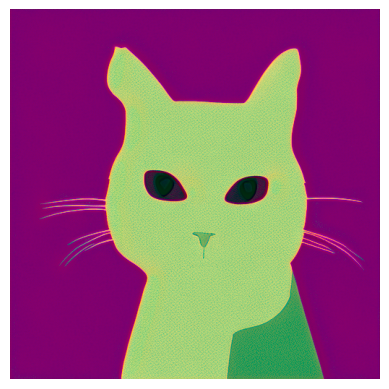

In [10]:
main()

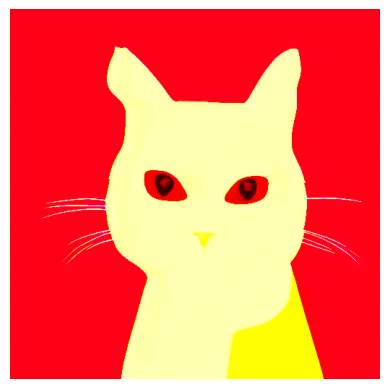

In [11]:
# write code that takes L A and B images as input and displays the image using matplotlib. Use kornia for image processing

import kornia
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os



def display_image(L, A, B):
    # Convert L, A, B to a single image
    lab_image = np.zeros((L.shape[0], L.shape[1], 3), dtype=np.uint8)
    lab_image[:, :, 0] = L
    lab_image[:, :, 1] = A
    lab_image[:, :, 2] = B
    
    # Convert NumPy array to PyTorch tensor
    # kornia expects tensor with shape [B, C, H, W]
    lab_tensor = torch.from_numpy(lab_image).float().permute(2, 0, 1).unsqueeze(0)
    
    # Convert LAB to RGB using kornia
    rgb_tensor = kornia.color.lab_to_rgb(lab_tensor)
    
    # Convert tensor back to numpy for display
    rgb_image = rgb_tensor.squeeze(0).permute(1, 2, 0).numpy()
    
    # Ensure values are in displayable range
    rgb_image = np.clip(rgb_image, 0, 1)
    
    # Display the image using matplotlib
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()
    
    
def main():
    
    L_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_input_L.png"
    A_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_pred_A_norm.png"
    B_image_path = "/data1/cs25mtech02006/lasagna/results/cat/1.png/lighting_3/controlnet_lasagna/eval/epoch_00500_pred_B_norm.png"

    # Read the L, A, B images
    L = cv2.imread(L_image_path, cv2.IMREAD_GRAYSCALE)
    A = cv2.imread(A_image_path, cv2.IMREAD_GRAYSCALE)
    B = cv2.imread(B_image_path, cv2.IMREAD_GRAYSCALE)

    # Display the image
    display_image(L, A, B)
    
main()
